# Toy Neural Network

[Neural Network Simulator](https://www.mladdict.com/neural-network-simulator)

![mladdict](mladdict.png)

### To-Do
* make an intro explaining the purpose of this notebook
* table of contents?
    * also look up the extension in jupyter notebooks for [table of contents](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/toc2/README.html)
    * [Installing NB Extensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html)

## Theory

### Architecture

*explain the whole structure here*

### Initialization

The weights are randomly initialized in this example to values between -1 and 1, like as shown in the image above. There actually is a way to strategically initialize weights for better overall learning, but we are going to start completely random for right now.

* find other ways to initialize weights and include a link here

### Forward Pass

#### 1) Input Layer

* our input is pretty simple with only two variables (neurons) and the expected output is one nueron as well
* ML Addict uses four training rows

#### 2) Hidden Layer

* this neural network only has one hidden layer

### Backpropogation Pass

### To-Do:
* Brush Up on the Chain Rule
* explain every formula using LaTex formulas

## Neural Network (My Implementation)

In [305]:
import numpy as np

class NeuralNetwork:
    
    def __init__(self, itter):
        """
        Initialize the weights (from the first itteration)
        * change itter to list of weights given (more correct)
        """
        
        # Hidden Layer        
        self.hidden_weights = np.array([
            [itter['w_2_11'], itter['w_2_21']],
            [itter['w_2_12'], itter['w_2_22']],
            [itter['w_2_13'], itter['w_2_23']]
        ])
        
        # Output Layer
        self.output_weights = np.array([
            itter['w_3_11'],
            itter['w_3_21'],
            itter['w_3_31']
        ])
        
    def forward_pass(self, X, y):
        
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        # Step 2) Hidden Layer
        self.hidden_activation = np.delete(sigmoid(np.sum(self.hidden_weights * X, axis = 1)), 0, 1)
        
        # Step 3) Output Layer
        self.output_activation = sigmoid(np.sum(self.output_weights * self.hidden_activation))
        
        # Step 4) Calculate the cost
        self.E = 0.5 * (y - self.output_activation)**2
        
        return self.E
        
    def backward_pass(self, X, y):
        
        # Step 5) Error in the output layer
        self.output_error = (y - self.output_activation) * self.output_activation * (1 - self.output_activation)
        
        # Step 6) Error in the hidden layer
        self.hidden_error = self.output_weights * float(self.output_error) * self.hidden_activation * (1 - self.hidden_activation)
        
        # Step 7) Calculate the error with respect to weights between hidden and output layer
        self.output_weights_error = self.hidden_activation * float(self.output_error)
        
        # Step 8) Calculate the error with respect to weights between input and hidden layer
        self.hidden_weights_error = np.multiply(X.reshape(1,2), self.hidden_error).reshape(3,2,1)
        
        # Step 9) Update the weights between hidden and output layer
        self.output_weights += self.output_weights_error
        
        # Step 10) Update the weights between input and hidden layer
        self.hidden_weights += self.hidden_weights_error
        

### Running My Neural Network

* make the run function loop through the pandas dataframe 
* print out the Error over time (graph this)

[0.046170118630887394, 0.24782670337447782, 0.2960780353998369, 0.031034487774714247]


Text(0,0.5,'Error')

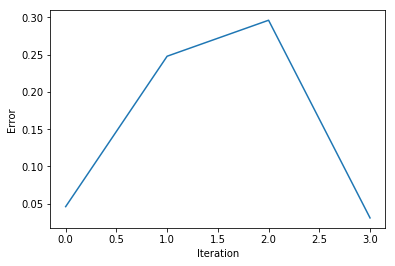

In [319]:
import pandas as pd
import matplotlib.pyplot as plt

itterations = 4
test = pd.read_csv('tests/0_test.csv')

Errors = []

# Initializing the Neural Network with the weights form the first Itteration
NN = NeuralNetwork(test[test['itteration'] == 0])
    
for i in range(itterations):
    
    # input for iteration
    X = np.array([test['x_1'][i], test['x_2'][i]])
    y = test['y'][i]
    
    # run forwards and backwards
    Errors.append(NN.forward_pass(X, y))
    NN.backward_pass(X, y)
    
# Display Information About E
print(Errors)
plt.plot(Errors)
plt.xlabel('Iteration')
plt.ylabel('Error')

## Data Collection

This is a little bit of extra code for creating the test datasets. Selenium is great for scraping this data because it can interact with the model. The data of each step and iteration will be stored in CSVs so the selenium script doesn't need to be run for each test case. 

* following [Selenium Python API Guide](https://selenium-python.readthedocs.io/index.html)
    * [Chapter 4](https://selenium-python.readthedocs.io/locating-elements.html) explains how to locate elements (I am using CSS selector)
* this repository uses [ChromeDriver](https://sites.google.com/a/chromium.org/chromedriver/downloads) for Linux (v77)

### The Implementation

* [this article](https://markhneedham.com/blog/2015/07/15/python-unicodedecodeerror-ascii-codec-cant-decode-byte-0xe2-in-position-0-ordinal-not-in-range128/) explains all the weird unicode stuff (for the minus sign in the 'get_value' function)

In [124]:
# Data Collection 

# Selenium Webdriver Library
from selenium import webdriver

"""
    itters -> the itteration of the neural network
    test_file -> the csv where the results will be stored
"""
def test_vals_collect(itters):
    
    def get_value(css_selector):
        
        num_string = driver.find_element_by_css_selector(css_selector).text.split('=')[-1]
        
        # this handles weird unicode negative values
        if not num_string.find(u'−'):
            return float(num_string.split(u'−')[1]) * -1
        
        return float(num_string)
    
    def one_step():
        driver.find_element_by_css_selector(
            '#app > div > div:nth-child(2) > div > div > div:nth-child(2) > div > div:nth-child(2) > div > div > div.player.text-center > button:nth-child(2)'
        ).click()
        
    # Setup Driver / Launch Site
    driver = webdriver.Chrome("./chromedriver")
    driver.get("https://www.mladdict.com/neural-network-simulator")
        
    rows = []
    
    test_values = {
        0: [1, 1, 0],
        1: [0, 1, 1],
        2: [1, 0, 1],
        3: [0, 0, 0]
    }
        
    for i in range(itters):

        # 0) Initialization

        selector_parent_path = '#app > div > div:nth-child(2) > div > div > div:nth-child(2) > div > div:nth-child(1) > div.col-md-10.col-sm-12.col-xs-12.vcenter > div > svg > svg:nth-child(2) >'

        w_2_11 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(1) > svg > text')
        w_2_21 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(4) > svg > text')
        w_2_12 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(2) > svg > text')
        w_2_22 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(5) > svg > text')
        w_2_13 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(3) > svg > text')
        w_2_23 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(6) > svg > text')

        w_3_11 = get_value(selector_parent_path + 'svg:nth-child(2) > svg:nth-child(1) > svg > text')
        w_3_21 = get_value(selector_parent_path + 'svg:nth-child(2) > svg:nth-child(2) > svg > text')
        w_3_31 = get_value(selector_parent_path + 'svg:nth-child(2) > svg:nth-child(3) > svg > text')

        # 1) Input Layer

        one_step()
        
        test = test_values[i % 4]

        x_1 = test[0] 
        x_2 = test[1]
        y = test[2]
        
        # 2) Hidden Layer

        one_step()

        a_1_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(3) > div:nth-child(2) > div > div.panel-body > div:nth-child(1) > span')
        a_2_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(3) > div:nth-child(2) > div > div.panel-body > div:nth-child(2) > span')
        a_3_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(3) > div:nth-child(2) > div > div.panel-body > div:nth-child(3) > span')

        # 3) Output Layer

        one_step()

        a_1_3 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(4) > div:nth-child(1) > div > div.panel-body > div > span > span > span.katex-html > span.base.displaystyle.textstyle.uncramped')

        # 4) Calculate the cost

        one_step()

        E = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(4) > div:nth-child(2) > div > div.panel-body > div > span')

        # 5) Error in the output layer

        one_step()

        d_1_3 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(6) > div:nth-child(1) > div > div.panel-body > div > span > span > span.katex-html > span.base.displaystyle.textstyle.uncramped')

        # 6) Error in the hidden layer

        one_step()

        d_1_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(6) > div:nth-child(2) > div > div.panel-body > div:nth-child(1) > span')
        d_2_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(6) > div:nth-child(2) > div > div.panel-body > div:nth-child(2) > span')
        d_3_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(6) > div:nth-child(2) > div > div.panel-body > div:nth-child(3) > span')

        # 7) Calculate the error with respect to weights between hidden and output layer

        one_step()

        dE_dw_11_3 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(7) > div:nth-child(1) > div > div.panel-body > div:nth-child(1) > span')
        dE_dw_21_3 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(7) > div:nth-child(1) > div > div.panel-body > div:nth-child(2) > span')
        dE_dw_31_3 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(7) > div:nth-child(1) > div > div.panel-body > div:nth-child(3) > span')

        # 8) Calculate the error with respect to weights between input and hidden layer

        one_step()

        dE_dw_11_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(7) > div:nth-child(2) > div > div.panel-body > div:nth-child(1) > span')
        dE_dw_12_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(7) > div:nth-child(2) > div > div.panel-body > div:nth-child(2) > span')
        dE_dw_13_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(7) > div:nth-child(2) > div > div.panel-body > div:nth-child(3) > span')
        dE_dw_21_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(7) > div:nth-child(2) > div > div.panel-body > div:nth-child(4) > span')
        dE_dw_22_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(7) > div:nth-child(2) > div > div.panel-body > div:nth-child(5) > span')
        dE_dw_23_2 = get_value('#app > div > div:nth-child(2) > div > div > div:nth-child(3) > div > div > div:nth-child(7) > div:nth-child(2) > div > div.panel-body > div:nth-child(6) > span')

        # 9) Update the weights between hidden and output layer

        one_step()

        back_w_3_11 = get_value(selector_parent_path + 'svg:nth-child(2) > svg:nth-child(1) > svg > text')
        back_w_3_21 = get_value(selector_parent_path + 'svg:nth-child(2) > svg:nth-child(2) > svg > text')
        back_w_3_31 = get_value(selector_parent_path + 'svg:nth-child(2) > svg:nth-child(3) > svg > text')

        # 10) Update the weights between input and hidden layer

        one_step()

        back_w_2_11 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(1) > svg > text')
        back_w_2_21 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(4) > svg > text')
        back_w_2_12 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(2) > svg > text')
        back_w_2_22 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(5) > svg > text')
        back_w_2_13 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(3) > svg > text')
        back_w_2_23 = get_value(selector_parent_path + 'svg:nth-child(1) > svg:nth-child(6) > svg > text')
        
        # This is how the CSV data is stored
        rows.append({
            'itteration' : i,
            'w_2_11' : w_2_11, 'w_2_21' : w_2_21, 'w_2_12' : w_2_12, 'w_2_22' : w_2_22, 'w_2_13' : w_2_13, 'w_2_23' : w_2_23,
            'w_3_11' : w_3_11, 'w_3_21' : w_3_21, 'w_3_31' : w_3_31,
            'x_1' : x_1, 'x_2' : x_2, 'y' : y,
            'a_1_2' : a_1_2, 'a_2_2' : a_2_2, 'a_3_2' : a_3_2,
            'a_1_3' : a_1_3,
            'E' : E,
            'd_1_3' : d_1_3,
            'd_1_2' : d_1_2, 'd_2_2' : d_2_2, 'd_3_2' : d_3_2,
            'dE_dw_11_3' : dE_dw_11_3, 'dE_dw_21_3' : dE_dw_21_3, 'dE_dw_31_3' : dE_dw_31_3, 
            'dE_dw_11_2' : dE_dw_11_2, 'dE_dw_12_2' : dE_dw_11_2, 'dE_dw_13_2' : dE_dw_13_2, 'dE_dw_21_2' : dE_dw_21_2, 'dE_dw_22_2' : dE_dw_22_2, 'dE_dw_23_2' : dE_dw_23_2,
            'back_w_3_11' : back_w_3_11, 'back_w_3_21' : back_w_3_21, 'back_w_3_31' : back_w_3_31,
            'back_w_2_11' : back_w_2_11, 'back_w_2_21' : back_w_2_21, 'back_w_2_12' : back_w_2_12, 'back_w_2_22' : back_w_2_22, 'back_w_2_13' : back_w_2_13, 'back_w_2_23' : back_w_2_23
        })
    
    # End
    driver.close()
    
    return rows

### Running the Collection

In [125]:
import pandas as pd

tests = 4
itterations = 4

for t in range(tests):
    
    test_dict = test_vals_collect(itterations)
    filename = "tests/" + str(t) + "_test.csv"
    pd.DataFrame.from_dict(test_dict).to_csv(filename)

Few! That's a lot of stuff for such a tiny neural network! Imagine how much math is behind a neural network with multiple hidden layers! 🙀